In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [9]:
data_volkswagen = pd.read_csv("volkswagen_cleaned.csv")

In [24]:
data_volkswagen["transmission"].replace("Poluautomatik", 
           "Polu-automatik", inplace=True)

C:\Users\kapid\AppData\Local\Temp\ipykernel_16212\3745166779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_volkswagen["transmission"].replace("Poluautomatik",


In [33]:
data_volkswagen["transmission"].unique()

array(['Automatik', 'Manuelni', 'Polu-automatik'], dtype=object)

In [32]:
data_volkswagen["type"].nunique()

11

In [34]:
data_volkswagen

,displacement,doors,fuel,kilowatts,location,manufacturer,mileage,model,price,title,...,drivetrain,emissionStandard,rimSize,transmission,type,airCondition,navigation,registration,transmission_encoded,type_encoded
0,2.0,4/5,Dizel,140.0,Banja Luka,Volkswagen,150000.0,Arteon,53000,Volkswagen Arteon / 2018 / 2.0 TDI / 190 KS / DSG,...,Prednji,Euro 6,19,Automatik,Limuzina,True,True,True,2,6
1,1.6,4/5,Dizel,88.0,Gradačac,Volkswagen,166.0,Passat,26500,VW Passat 8 TOP Stanje Uvoz Pasat8 Urađ Vel Se...,...,Prednji,Euro 6,17,Manuelni,Limuzina,False,True,True,0,6
2,1.6,4/5,Dizel,77.0,Sarajevo - Stari Grad,Volkswagen,230000.0,Golf,13000,Volkswagen golf 6 karavan variant tdi 1.6,...,Prednji,Euro 5,16,Manuelni,Malo auto,True,False,True,0,3
3,1.6,4/5,Benzin,72.0,Sarajevo - Centar,Volkswagen,220000.0,Scirocco,9000,"BMW e30 kocka 316i, Volkswagen Scirocco",...,Zadnji,Euro 5,16,Manuelni,Sportski/kupe,False,False,False,0,5
4,2.0,4/5,Dizel,103.0,Teslić,Volkswagen,280000.0,Tiguan,19900,"Tiguan 4x4 2,0 TDI",...,Prednji,Euro 4,18,Automatik,SUV,True,True,True,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50560,2.0,4/5,Dizel,81.0,Sarajevo - Stari Grad,Volkswagen,215000.0,Golf,14750,Volkswagen Golf 6 2.0Tdi 81kw DSG EXTRA STANJE,...,Prednji,Euro 5,16,Manuelni,Malo auto,False,True,False,0,3
50561,1.6,4/5,Dizel,77.0,Breza,Volkswagen,286146.0,Golf,14999,Volkswagen Golf 2012 1.6 TDI 77 KW NAVI/PDC 06...,...,Prednji,Euro 5,16,Manuelni,Malo auto,False,True,False,0,3
50562,2.0,4/5,Dizel,103.0,Busovača,Volkswagen,271000.0,Passat,12000,Volkswagen Passat 2010 Tek registrovan,...,Prednji,Euro 5,16,Automatik,Limuzina,False,False,True,2,6
50563,1.6,4/5,Dizel,77.0,Tešanj,Volkswagen,262035.0,Jetta,14600,Volkswagen Jetta,...,Prednji,Euro 5,16,Manuelni,Limuzina,False,False,False,0,6


In [30]:
# Step 1: Calculate the average price for each unique value in 'category_column'
avg_price_per_category = data_volkswagen.groupby('transmission')['price'].mean()

# Step 2: Sort the unique values by the average price
sorted_categories = avg_price_per_category.sort_values().index

# Step 3: Create a mapping of categories to numbers (0 for lowest, 1 for second, 2 for highest)
category_mapping = {category: idx for idx, category in enumerate(sorted_categories)}

# Step 4: Replace the values in 'category_column' with their corresponding numeric values
data_volkswagen['transmission_encoded'] = data_volkswagen['transmission'].map(category_mapping)

In [31]:
# Step 1: Calculate the average price for each unique value in 'category_column'
avg_price_per_category = data_volkswagen.groupby('type')['price'].mean()

# Step 2: Sort the unique values by the average price
sorted_categories = avg_price_per_category.sort_values().index

# Step 3: Create a mapping of categories to numbers (0 for lowest, 1 for second, 2 for highest)
category_mapping = {category: idx for idx, category in enumerate(sorted_categories)}

# Step 4: Replace the values in 'category_column' with their corresponding numeric values
data_volkswagen['type_encoded'] = data_volkswagen['type'].map(category_mapping)

In [10]:
data_volkswagen_numeric = data_volkswagen[['displacement', 'kilowatts', 'mileage', 'price', 'year','transmission_encoded','type_encoded']]

In [11]:
data_volkswagen_numeric

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
0,2.0,140.0,150000.0,53000,2018,2,6
1,1.6,88.0,166.0,26500,2016,0,6
2,1.6,77.0,230000.0,13000,2010,0,3
3,1.6,72.0,220000.0,9000,1989,0,5
4,2.0,103.0,280000.0,19900,2011,2,9
...,...,...,...,...,...,...,...
50558,2.0,81.0,215000.0,14750,2009,0,3
50559,1.6,77.0,286146.0,14999,2012,0,3
50560,2.0,103.0,271000.0,12000,2010,2,6
50561,1.6,77.0,262035.0,14600,2012,0,6


In [20]:
data_volkswagen[data_volkswagen["type_encoded"]==0][["type","price"]]

,type,price
7349,Off Road,1650
12449,Off Road,1500
23567,Off Road,5000
28687,Off Road,8600
33990,Off Road,2500
42023,Off Road,2000


In [29]:
data_volkswagen.drop([15850, 22867], inplace=True)

<Axes: >

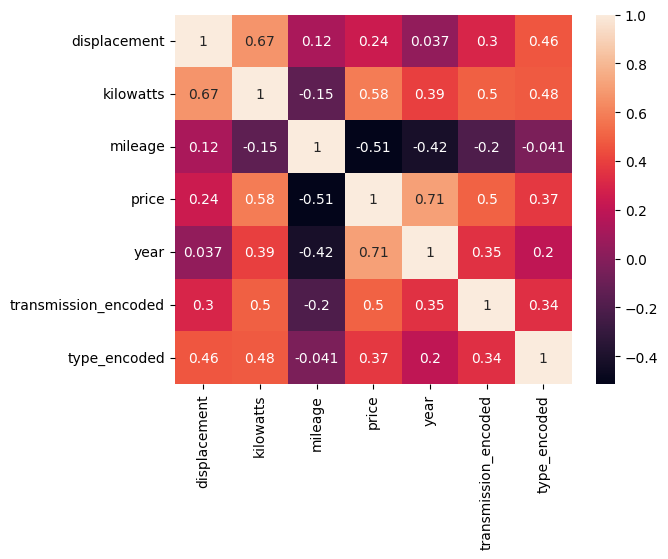

In [5]:
sns.heatmap(data=data_volkswagen_numeric.corr(), annot=True)

In [12]:
#MACHINE LEARNING DIO
data_volkswagen_numeric

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
0,2.0,140.0,150000.0,53000,2018,2,6
1,1.6,88.0,166.0,26500,2016,0,6
2,1.6,77.0,230000.0,13000,2010,0,3
3,1.6,72.0,220000.0,9000,1989,0,5
4,2.0,103.0,280000.0,19900,2011,2,9
...,...,...,...,...,...,...,...
50558,2.0,81.0,215000.0,14750,2009,0,3
50559,1.6,77.0,286146.0,14999,2012,0,3
50560,2.0,103.0,271000.0,12000,2010,2,6
50561,1.6,77.0,262035.0,14600,2012,0,6


In [13]:
X = data_volkswagen_numeric.drop(['price'], axis = 1).values
y= data_volkswagen_numeric['price'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Treniranje RandomForestRegressora sa najboljim hiperparametrima (prekopirati imena hiperparametara samo bez prefixa "regressor__")
model =  RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4, n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4,
                      n_estimators=300)

In [16]:
# Predikcija cijene za tražene specifikacije displacement, kilowatts, mileage, year, transmission_encoded, type_encoded
cijena = model.predict([[1.6, 130, 50_000, 2014, 0, 7]])
cijena_rounded = cijena[0].round(2)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"Cijena za tražene specifikacije iznosi: {cijena_rounded} KM")
print(r2)

Cijena za tražene specifikacije iznosi: 27223.23 KM
0.9433942905918944


In [3]:
data_volkswagen["transmission_encoded"].nunique()

3

In [5]:
data_volkswagen["type_encoded"].nunique()

11

In [27]:
data_volkswagen_numeric

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
0,2.0,140.0,150000.0,53000,2018,2,6
1,1.6,88.0,166.0,26500,2016,0,6
2,1.6,77.0,230000.0,13000,2010,0,3
3,1.6,72.0,220000.0,9000,1989,0,5
4,2.0,103.0,280000.0,19900,2011,2,9
...,...,...,...,...,...,...,...
50558,2.0,81.0,215000.0,14750,2009,0,3
50559,1.6,77.0,286146.0,14999,2012,0,3
50560,2.0,103.0,271000.0,12000,2010,2,6
50561,1.6,77.0,262035.0,14600,2012,0,6


In [28]:
data_volkswagen_numeric.to_csv("volkswagen_cleaned_numeric.csv", sep=',', index=False, encoding='utf-8')

In [9]:
data_volkswagen_numeric.describe().round(2)

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
count,50563.00,50563.00,50562.00,50563.00,50563.00,50563.00,50563.00
mean,1.82,89.09,240564.59,17197.70,2009.04,0.44,4.72
std,0.30,26.36,82020.71,14854.69,6.79,0.83,1.98
min,0.60,20.00,0.00,500.00,1950.00,0.00,0.00
25%,1.60,77.00,203000.00,8400.00,2006.00,0.00,3.00
50%,1.90,81.00,248000.00,13700.00,2010.00,0.00,4.00
75%,2.00,103.00,285000.00,20999.00,2013.00,0.00,6.00
max,5.00,300.00,1000000.00,189900.00,2024.00,2.00,10.00


In [27]:
data_volkswagen_numeric.describe().round(2)

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
count,50563.00,50563.00,50562.00,50563.00,50563.00,50563.00,50563.00
mean,1.82,89.09,240564.59,17197.70,2009.04,0.44,4.72
std,0.30,26.36,82020.71,14854.69,6.79,0.83,1.98
min,0.60,20.00,0.00,500.00,1950.00,0.00,0.00
25%,1.60,77.00,203000.00,8400.00,2006.00,0.00,3.00
50%,1.90,81.00,248000.00,13700.00,2010.00,0.00,4.00
75%,2.00,103.00,285000.00,20999.00,2013.00,0.00,6.00
max,5.00,300.00,1000000.00,189900.00,2024.00,2.00,10.00
